# Model choice and parameter estimation

Data is available in unprecedented amounts, and the field "Data Science" has been cobbled together from statistics, computer science, physics, and many more. Increasingly, the analysis capability is also increasing, and it is being made available to anyone with a laptop, through open source initiatives e.g. within the Python ecosystem.

### Libraries

I recomend using the Anaconda Python distribution. Here we will specifically use: NumPy, pandas, scikit-learn, matplotlib and seaborn.

To install them with conda:

conda install numpy pandas scikit-learn matplotlib seaborn

conda install -c conda-forge watermark

If conda asks you to update let it.

### How many k?

Initially, let's start with k-Means. Think of it as using straight lines (think Voroni diagrams) to seperate the data.

We will be able to play around with some variables below. I hope this will be fun!

In [187]:
#Some useful packages. I've tried to load the specific ones 
#when they come into play, so they're easier to identify.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling and easy stats plots
import numpy as np

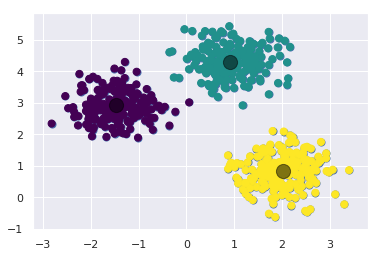

In [197]:
from sklearn.datasets.samples_generator import make_blobs #best name ever, and most usefull of functions!

#Try centers= 3, 9 and 20
centerSeed = 3

X, y_true = make_blobs(n_samples=600, centers=centerSeed,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);



from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=centerSeed)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



At this point, pretend we know nothing of the above! The cluser data make_blobs helpfully created is unknown to us, and we want to explore it! 

We proceed by estimating the AIC and BIC to explore

Bonus points for anyone who recognizes similarities to the lecture plots...

In [198]:
from sklearn import mixture

repeats = 10 # Remember there is stochasticity involved, so de do 10 repeats to collect some error estimates.
kClusters = 40 # Going up to 40 as out "guess" takes time, but it can be worth it!
data = X

criteriaAIC_BIC = np.zeros((repeats,2,kClusters))
for rep in np.arange(0,repeats):
    for nr in np.arange(1,kClusters):
        n_clusters=nr
        X=data
        model=mixture.GaussianMixture(n_components=n_clusters, init_params='kmeans')
        model.fit(X)
        criteriaAIC_BIC[rep,0,nr]=model.aic(X)
        criteriaAIC_BIC[rep,1,nr]=model.bic(X)

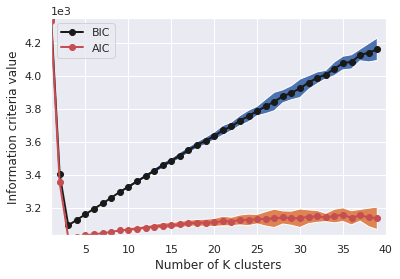

In [199]:
meanAIC = criteriaAIC_BIC[:, 0, 0:kClusters].mean(axis = 0)
stdAIC = criteriaAIC_BIC[:, 0, 0:kClusters].std(axis = 0)

meanBIC = criteriaAIC_BIC[:, 1, 0:kClusters].mean(axis = 0)
stdBIC = criteriaAIC_BIC[:, 1, 0:kClusters].std(axis = 0)

plt.plot(np.arange(0, kClusters),meanBIC, '-ok', label='BIC', linewidth=2)
plt.fill_between(np.arange(0, kClusters), meanBIC-2*stdBIC, meanBIC+2*stdBIC)

plt.plot(np.arange(0, kClusters),meanAIC, '-or', label='AIC', linewidth=2)
plt.fill_between(np.arange(0, kClusters), meanAIC-2*stdAIC, meanAIC+2*stdAIC)


plt.ylim(np.min(meanAIC[5:]), np.max(meanBIC))
plt.xlabel('Number of K clusters')
plt.ylabel('Information criteria value')
plt.legend()
plt.xlim(1,40)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('informationCriteriaAsymptoting_wError.png', format='png', dpi=500, bbox_inches='tight')  

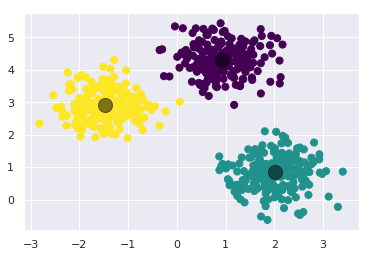

In [200]:
from sklearn.cluster import KMeans

### REPLACE! 
clusterGuess=3

kmeans = KMeans(n_clusters=clusterGuess)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


## What if the blobs are not round?

Unfortunately, most blobs one encounters are not round. Below we'll demonstrate what happens when we have different distributions and choose different models. Initially we use k-means on:

- Round blobs
- Anisotropic blobs
- Blobs of varying variance
- Blobs of different sizes

Automatically created module for IPython interactive environment


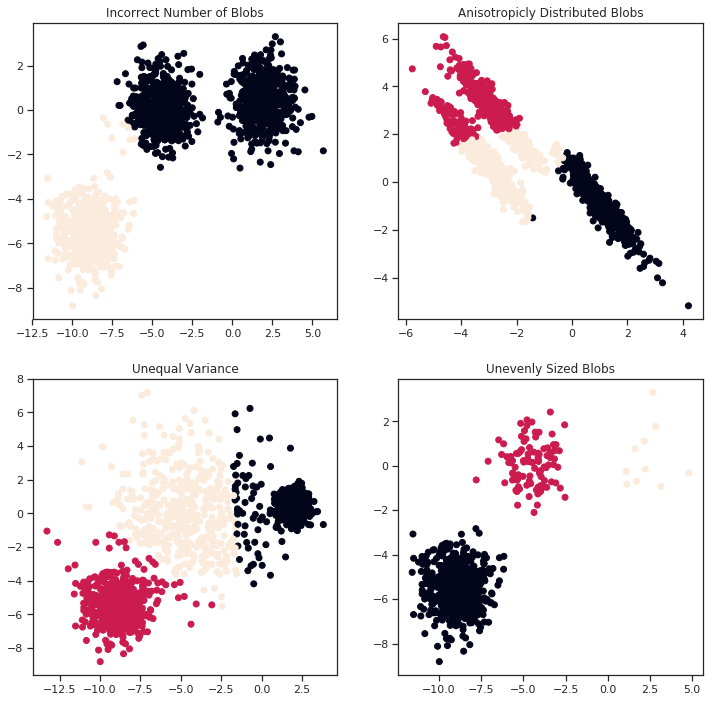

In [184]:
print(__doc__)

# Modofied by <maikejulie@gmail.com> from Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

#### Incorrect number of clusters ####
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

#### Anisotropicly distributed data ####
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

#### Different variance #####
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

##### Unevenly sized blobs ####
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

Our friend k-means is really great at blobs it is able to draw straight lines around easily. However, another clustering algorithm is DBSCAN. This is specialized in finding dense numbers of points, and is not sensitive to the shape of the data.

Automatically created module for IPython interactive environment


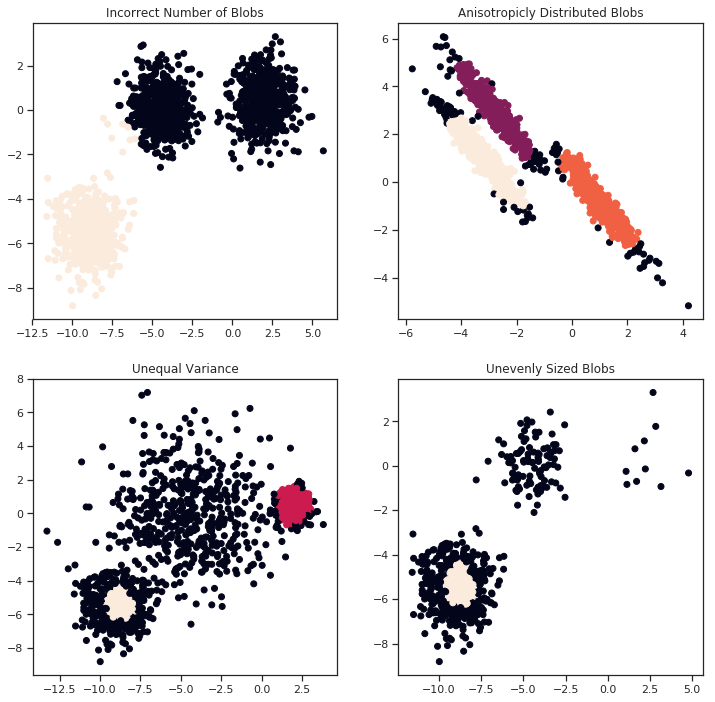

In [180]:
print(__doc__)

EPS=0.3
MIN_SAMP=20

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = DBSCAN(eps=EPS, min_samples=MIN_SAMP).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

Note that BDSCAN generally does terribly on anything other than the very densely populated areas! Lastly, let's explore this looking at the point density and histograms associated with the data. 

Hope is that you will see what wealth of information about the underlying structure is available looking at these metrics.

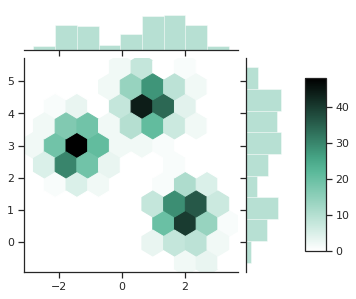

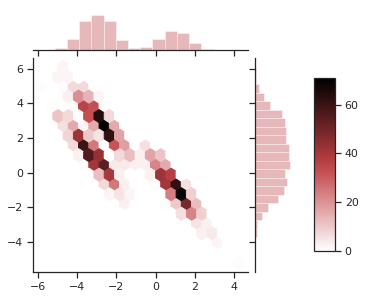

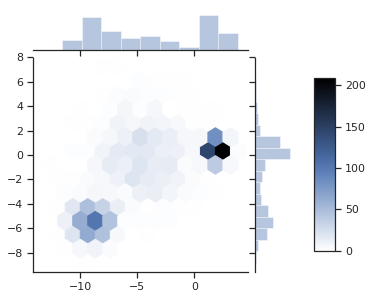

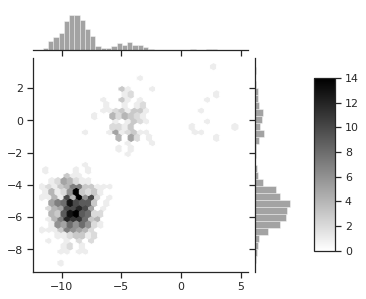

In [201]:
sns.set(style="ticks")

hexplot =sns.jointplot(X[:, 0], X[:, 1], kind="hex", color="#4CB391")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

hexplot =sns.jointplot(X_aniso[:, 0], X_aniso[:, 1], kind="hex", color="r")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

hexplot =sns.jointplot(X_varied[:, 0], X_varied[:, 1], kind="hex", color="b")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

hexplot =sns.jointplot(X_filtered[:, 0], X_filtered[:, 1], kind="hex", color="k")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# make new ax object for the cbar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

This tutorial is by Maike Sonnewald (github: maikejulie, maikejulie@gmail.com) but drew from Randy Olson (github: rhiever), and Phil Roth <mr.phil.roth@gmail.com>
(License: BSD 3 clause)